# Scattering of Two Impulsive Gravitational Plane Waves by Khan & Penrose Nature Paper
## Geoff Cope
## Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
## January 1 st, 2021 New Year' s Day!

https://www.nature.com/articles/229185a0

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
p,q,u,v,x,y,du,dv,dx,dy = symbols( 'p q u v x y du dv dx dy', positive = True, real = True ) 

In [4]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [5]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [6]:
r = Function('r')(p)
r

In [7]:
w = Function('w')(q)
w

In [8]:
t = Function('t')(p,q)
t

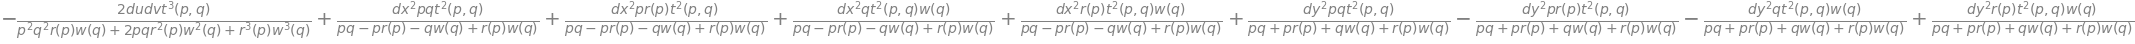

In [9]:
lineElement = expand( (dy**2*(-q + r)*t**2*(-p + w))/((q + r)*(p + w)) + (dx**2*(q + r)*t**2*(p + w))/((-q + r)*(-p + w)) - (2*du*dv*t**3)/(r*w*(p*q + r*w)**2) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                                                                         3                 
⎢                                                                       -t (p, q)           
⎢                        0                          ────────────────────────────────────────
⎢                                                    2  2                    2     2       3
⎢                                                   p ⋅q ⋅r(p)⋅w(q) + 2⋅p⋅q⋅r (p)⋅w (q) + r 
⎢                                                                                           
⎢                      3                                                                    
⎢                    -t (p, q)                                                              
⎢─────────────────────────────────────────────────                          0               
⎢ 2  2                    2     2       3     3                                             
⎢p ⋅q ⋅r(p)⋅w(q) + 2⋅p⋅q⋅r (p)⋅w (q) + r (p)⋅w (q)                    

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡                                                                         3                 
⎢                                                                       -t (p, q)           
⎢                        0                          ────────────────────────────────────────
⎢                                                    2  2                    2     2       3
⎢                                                   p ⋅q ⋅r(p)⋅w(q) + 2⋅p⋅q⋅r (p)⋅w (q) + r 
⎢                                                                                           
⎢                      3                                                                    
⎢                    -t (p, q)                                                              
⎢─────────────────────────────────────────────────                          0               
⎢ 2  2                    2     2       3     3                                             
⎢p ⋅q ⋅r(p)⋅w(q) + 2⋅p⋅q⋅r (p)⋅w (q) + r (p)⋅w (q)                    

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v x y" )
u,v,x,y = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎣⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎦

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢ 

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢ 